# Rozdzielczość obrazu. Interpolacja.

## Cel zajęć:

* zapoznanie z pojęciem rozdzielczości przestrzennej (rozmiaru obrazu),
* metody interpolacji najbliższego sąsiada oraz dwuliniowa,
* zapoznanie z pojęciem rozdzielczości dpi (ang. dots per inch),
* zapoznanie z pojęciem rozdzielczości  poziomów jasności (dla obrazów w skali szarości),
* zadanie domowe: interpolacja dwusześcienna.

## Rodzielczość przestrzenna

Dyskretna reprezentacja obrazu to zwykle macierz dwu (N x M - obraz w skali szarości) lub trójwymiarowa (N x M x 3 - obraz kolorowy).
Przez rozdzielczość przestrzenną rozumie się liczbę pikseli z których składa się obraz.
Przykładowo rozdzielczość VGA to  640 x 480, Full HD to 1920 x 1080, a 4K to 3840 x 2160.
Rozdzielczość obrazu można modyfikować (zwiększać/zmniejszać), co nazywa się skalowaniem obrazu.
Warto wiedzieć, że zwiększenie rozdzielczości obrazu nie zwiększa ilości informacji, a jedynie liczbę pikseli (w sensie "lepiej nie będzie").
Ponadto skalowanie zawsze wprowadza pewne zniekształcenia, nawet przy zmniejszaniu rozmiaru.

W ramach niniejszego ćwiczenia zapoznamy się z metodami interpolacji, które są podstawą takich operacji jak: przybliżanie (zoom), zmiana rozdzielczości, rotacja obrazu, czy też korekcje geometryczne.
Jako przykład posłuży nam zmiana rozdzielczości, czyli inaczej mówiąc przepróbkowanie obrazu.
Dla przypomnienia - interpolacja to wykorzystanie znanych danych (wartości dla tzw. punktów węzłowych) do określania wartości w nieznanych lokalizacjach.

Zacznijmy od prostego przykładu.
Mamy obraz o rozdzielczości 500 x 500 pikseli, a chcemy go powiększyć do 750 x 750 pikseli -- tj. o~współczynnik 1,5.
Wyobraźmy sobie zatem, że dysponujemy siatką 750 x 750 o takim samym "rozmiarze" pojedynczego piksela jak obraz oryginalny.
Następnie siatkę tą ,,ścieśniamy'', tak aby miała rozmiar 500 x 500.
W rezultacie otrzymana siatka będzie miała mniejszy rozmiar pojedynczego piksela niż obraz oryginalny.
Schematycznie przedstawiono to na poniższym rysunku.

![Ilustracja interpolacji](https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/img/interEx57.png)


Pokazuje on przykład interpolacji: a) obraz 5x5, b) oraz 7x7, c) obraz 7x7 zmiejszony do 5x5.


Chcemy teraz poszczególnym elementom nowej siatki przyporządkować piksele z obrazu wejściowego.
Jedną z możliwości jest poszukanie "najbliższego" piksela w oryginalnym obrazie i wzięcie jego wartości.
Przykład takiego postępowania zaprezentowano na  poniższym rysunku.

![Ilustracja najbliższego sąsiada](https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/img/inteNNEx.png)

Kilka słów wyjasnienia.
Kolorem ciemnoszarym oznaczono siatkę 5x5, a czarnym 7x7 (już po przeskalowaniu).
Nasze zadanie sprowadza się do zalezienia dla każdej kropki czarnej (umowny środek piksela), najbliżej leżącej kropki szarej - oznaczono to dla pierwszych trzech wierzszy obrazu liniami.

Po zrealizowaniu powyższego kroku dla całego obrazu wykonujemy "rozciągniecie" do rozdzielczości 750 x 750.
W ten sposób uzyskujemy finalny efekt zmiany rozdzielczości.

## Interpolacja metodą najbliższego sąsiada

Takie postępowanie określa się mianem **interpolacji metodą najbliższego sąsiada** (ang. *nearest neighbour interpolation*).
W ramach pierwszego etapu ćwiczenia zaimplementujemy to podejście.

1. Ładujemy potrzebne biblioteki, pobieramy obrazy z repozytorium, wczytujemy jeden z obrazów testowych (*parrot.bmp*) i wyświetlamy go:

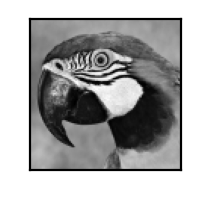

In [2]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

# Load required files
if not os.path.exists("parrot.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/parrot.bmp --no-check-certificate
if not os.path.exists("clock.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/clock.bmp --no-check-certificate
if not os.path.exists("chessboard.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/chessboard.bmp --no-check-certificate
if not os.path.exists("lena.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/lena.bmp --no-check-certificate
if not os.path.exists("firetruck.jpg") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/firetruck.jpg --no-check-certificate


I = cv2.imread('parrot.bmp')           # Read image
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY) # Convert to RGB

# Display
plt.figure(figsize=(I.shape[0]/100,I.shape[1]/100), dpi=200)
plt.imshow(I, cmap ="gray")
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

2. Definiujemy funkcję do interpolacji metodą najbliższego sąsiada.

Jako argumenty wejściowe powinna ona przyjąć obraz oraz współczynniki skalowania w pionie i poziomie.
Wyjściem powinien być natomiast obraz w nowej rozdzielczości.
Wewnątrz należy:

* odczytać wymiary obrazka wejściowego,
* wyliczyć wymiary obrazka wyjściowego (tj. wymnożyć wymiary wejściowe przez skalę i zaokrąglić do liczb całkowitych),
* utworzyć nowy obraz o ww. rozmiarze,
* w pętli po nowym obrazie, dla każdego piksela, wykorzystując współczynniki skalowania, odnaleźć najbliższego sąsiada.




In [3]:
# TODO: Do samodzielnej implemetantacji
def interpolate_nn(image,scale_factor):
	(rows, cols) = image.shape
	scaled_height = int(rows * scale_factor[0])
	scaled_weight = int(cols * scale_factor[1])

	row_ratio = rows / scaled_height
	col_ratio = cols / scaled_weight

	row_position = np.floor(np.arange(scaled_height) * row_ratio).astype(int)
	column_position = np.floor(np.arange(scaled_weight) * col_ratio).astype(int)

	scaled_image = np.zeros((scaled_height, scaled_weight))

	for i in range(scaled_height):
		for j in range(scaled_weight):
			scaled_image[i, j] = image[row_position[i], column_position[j]]

	return scaled_image

3. Testujemy stworzoną funkcję:
    * dla skali 1.5, 1.5 i obrazka *parrot*,
    * dla 2.5, 2.5 - tu okaże się, że do kodu trzeba dopisać zabezpieczenie przed wyjściem poza zakres,
    * dla niejednakowych skal np. 1.5 i 2.5,
    * dla skal mniejszych od 1,
    * dla niesymetrycznego obrazka *clock*,
    * dla obrazka z szachownicą *chessboard*.

Uwaga: proszę dla powyższych przypadków przygotować osobne sekcje kodu - tak, aby wyświetlały się wszystkie rozważane przypadki.

Wykonana metoda jest bardzo prosta i szybka, ale wprowadza pewne niepożądane artefakty, w szczególnie źle odwzorowane są linie proste.
Z drugiej strony sprawdza się w pewnych nietypowych przypadkach.
Zostanie to zademonstrowane w dalszej części ćwiczenia.

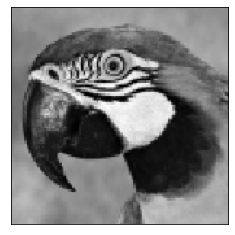

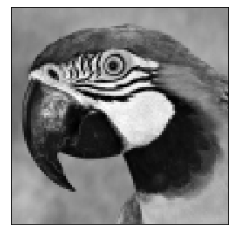

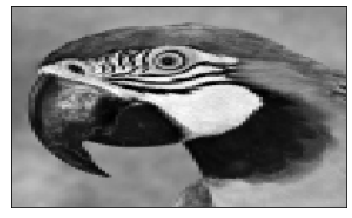

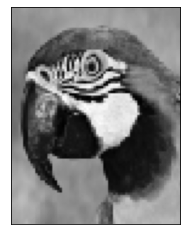

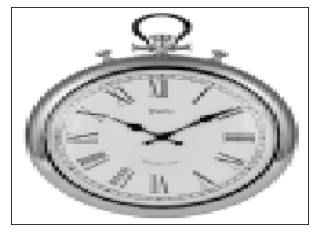

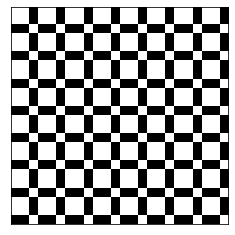

In [4]:
# TODO: Do samodzielnej implemetantacji
I2 = interpolate_nn(I, [1.5, 1.5])
I3 = interpolate_nn(I, [2.5, 2.5])
I4 = interpolate_nn(I, [1.5, 2.5])
I5 = interpolate_nn(I, [0.9, 0.7])

clock = cv2.imread("clock.bmp")
clock = cv2.cvtColor(clock, cv2.COLOR_BGR2GRAY)
clock_int = interpolate_nn(clock, [1.5, 2.5])

chessboard = cv2.imread("chessboard.bmp")
chessboard = cv2.cvtColor(chessboard, cv2.COLOR_BGR2GRAY)
chessboard_int = interpolate_nn(chessboard, [1.5, 1.5])

plt.imshow(I2, cmap ="gray")
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

plt.imshow(I3, cmap ="gray")
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

plt.imshow(I4, cmap ="gray")
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

plt.imshow(I5, cmap ="gray")
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

plt.imshow(clock_int, cmap ="gray")
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

plt.imshow(chessboard_int, cmap ="gray")
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()



## Interpolacja dwuliniowa

W praktyce, lepszym rozwiązaniem zwykle okazuje tzw. **interpolacja dwuliniowa** (ang. *bilinear interpolation*).
Wykorzystuje ona informację o czterech najbliższych sąsiadach do określenia nowej wartości piksela.

Jeśli przez $(i,j)$ oznaczymy współrzędne poszukiwanego piksela, a przez $I(i,j)$ jego jasność (składową w~odcieniach szarości) to jego wartość można obliczyć wykorzystując równanie:
\begin{equation}
I(i,j) = a \cdot i + b \cdot j+ c \cdot i \cdot j + d
\end{equation}
gdzie: współczynniki $a,b,c,d$ można wyliczyć na podstawie czterech najbliższych sąsiadów.

![Ilustracja dwuliniowej](https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/img/interABCD.png)

Prześledźmy to na przykładzie z powyższego rysunku.
Niech współrzędne poszczególnych punktów to $A = (j_1,i_1)$, $B = (j_1,i_2)$, $ C= (j_2,i_2)$ oraz $D = (j_2,i_1)$.
W pierwszej kolejności dokonujemy interpolacji wartości w punktach $AB$ i $CD$ -- czyli poziomo.
Wychodząc od równania prostej otrzymujemy:

\begin{equation}
f(AB) \approx \frac{i_2 - i}{i_2-i_1}f(A) + \frac{i - i_1}{i_2-i_1}f(B)
\end{equation}

\begin{equation}
f(CD) \approx \frac{i_2 - i}{i_2-i_1}f(D) + \frac{i - i_1}{i_2-i_1}f(C)
\end{equation}

Następnie wykonujemy analogiczną interpolację w pionie:
\begin{equation}
f(ABCD) \approx \frac{j_2 - j}{j_2-j_1}f(AB) + \frac{j - j_1}{j_2-j_1}f(CD)
\end{equation}

Łącząc powyższe równania otrzymujemy:
\begin{equation}
f(ABCD) \approx \frac{1}{(i_2 - i_1)(j_2-j_1)} ( f(A)(i_2-i)(j_2 - y) + f(B)(i-i_1)(j_2 - j) \\ + f(C)(i-i_1)(j-j_1) + f(D)(i_2-i)(j-j_1))
\end{equation}
gdzie zapis $f(X)$ oznacza wartość piksela w punkcie $X$.

Rozważania można uprościć przyjmując, że narożniki rozpatrywanego kwadratu mają następujące współrzędne: $A = (0,0)$, $B = (0,1)$, $ C= (1,1)$ oraz $D = (1,0)$.
Wtedy powyższe równanie można zapisać:
\begin{equation}
f(ABCD) \approx f(A)(1-i)(1-j) + f(B)i(1-j) + f(C)ij + f(D)(1-i)j
\end{equation}

lub macierzowo:
\begin{equation}
f(ABCD) \approx \begin{bmatrix}1 - i & i \end{bmatrix} \begin{bmatrix} f(A) & f(D) \\\\ f(B) & f(C)  \end{bmatrix}   \begin{bmatrix} 1-j \\\\ j  \end{bmatrix}
\end{equation}

Uwaga.
Nieco wbrew nazwie interpolacja dwuliniowa nie jest operacją liniową.
W złożeniu dwóch operacji liniowych pojawia się człon $xy$.

Warto dodać, że kolejny ``poziom wtajemniczenia'' to **interpolacja dwusześcienna** (ang. *bicubic interpolation*).
Dana jest ona wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}
Jej implementacja stanowi zadanie domowe do bieżącego ćwiczenia.

Trzy powyżej przedstawione metody bynajmniej nie wyczerpują tematu.
Wystarczy choćby otworzyć stronę [wiki o skalowaniu](https://en.wikipedia.org/wiki/Image_scaling), by zobaczyć, że metod jest dużo więcej.



Wykorzystując powyższe równania zaimplementuj interpolację dwuliniową:
* dobrym punktem wyjścia będzie stworzona funkcja do interpolacji metodą najbliższego sąsiada,
* początek powinien być identyczny,
* różnice rozpoczynają się w momencie obliczenia współrzędnych nowego piksela,
* jeśli chcemy zastosować opisane powyżej wzory (w wariancie uproszczonym), to musimy wyliczyć współrzędne punktów $A,B,C,D$,
* w pierwszym kroku obliczamy współrzędne $A$ tj. $(0,0)$ - należy do tego wykorzystać funkcję *floor* (np. $i_1 = floor(i / h_{scale})$).
  Proszę ten krok odnieść do przedstawionego rysunku poglądowego,
* obliczenie współrzędnych $B,C,D$ jest już proste i sprowadza się do operacji `+1`,
* potrzebujemy jeszcze część ułamkową współrzędnych punktu $ABCD$ tj. $(i,j)$ - od ilorazu $i/h_{scale}$ należy odjąć wartość $i_1$
* wykorzystując wyznaczone współrzędne, należy pobrać wartości jasności w punktach $A,B,C,D$, tj. $f(A),f(B),f(C),f(D)$, podstawić do odpowiedniego równania i wykonać interpolację.

  Uwagi:
* Tworzenie macierzy *np.array*, mnożenie macierzy *np.dot*. Przy tworzeniu macierzy proszę zwrócić uwagę na niezbędne nawiasy kwadratowe.
* Przy próbie uruchomienia kodu pewnie okaże się, że wystąpi przekroczenie zakresu - należy dodać stosowne zabezpiczenie.

Proszę dla interpolacji dwuliniowej wykonać takie same eksperymenty, jak dla  najbliższego sąsiada.




In [5]:
# TODO: Do samodzielnej implemetantacji
def bilinear(image, scale_factor):
    height,width =image.shape
    m,n = int(height*scale_factor[0]), int(width*scale_factor[1])
    emptyImage=np.zeros((m,n), dtype=np.uint8)
    value=np.zeros((m,n), dtype=np.uint8)
    sh=m/height
    sw=n/width

    for i in range(m):
        for j in range(n):
            x = i/sh
            y = j/sw
            p=i/sh-x
            q=j/sw-y
            x=int(x)-1
            y=int(y)-1

            value[i,j]=int(image[x,y]*(1-p)*(1-q)+image[x,y+1]*q*(1-p)+image[x+1,y]*(1-q)*p+image[x+1,y+1]*p*q)

            emptyImage[i, j] = value[i,j]
    return emptyImage


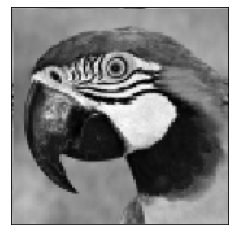

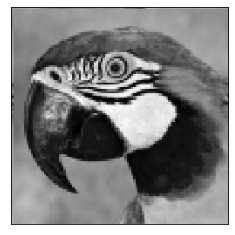

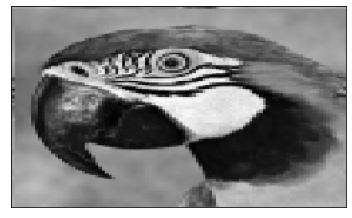

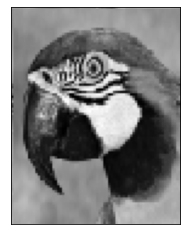

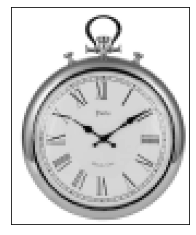

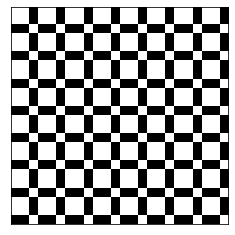

In [6]:
I2 = bilinear(I, [1.5, 1.5])
I3 = bilinear(I, [2.5, 2.5])
I4 = bilinear(I, [1.5, 2.5])
I5 = bilinear(I, [0.9, 0.7])

clock = cv2.imread("clock.bmp")
clock = cv2.cvtColor(clock, cv2.COLOR_BGR2GRAY)
clock_int = bilinear(clock, [2, 2])

chessboard = cv2.imread("chessboard.bmp")
chessboard = cv2.cvtColor(chessboard, cv2.COLOR_BGR2GRAY)
chessboard_int = bilinear(chessboard, [1.5, 1.5])

plt.imshow(I2, cmap ="gray")
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

plt.imshow(I3, cmap ="gray")
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

plt.imshow(I4, cmap ="gray")
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

plt.imshow(I5, cmap ="gray")
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

plt.imshow(clock_int, cmap ="gray")
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

plt.imshow(chessboard_int, cmap ="gray")
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()
#TODO Do samodzielnej implementacji



## Intepolacja w OpenCV

W OpenCV dostępna jest funkcja `resize`, która służy do zmiany rozmiaru obrazka.
Składnia jest następująca `dst = cv2.resize(	src, dsize[, dst[, fx[, fy[, interpolation]]]] )`, gdzie `det` to obraz wynikowy, `src` obraz źródłowy, `dsize` rozmiar docelowy (ew. można podać współczynniki skalowania dla poszczególnych osi: `fx,fy`), `interpolation` metoda interpolacji.
Metod podstawowych dostępnych jest 5:
- najbliższego sąsiada - ` cv2.INTER_NEAREST`,
- dwuliniowa - ` cv2.INTER_LINEAR`,
- dwukubiczna - ` cv2.INTER_CUBIC`,
- *area* - ` cv2.INTER_AREA`,
- *lanczos4* - ` cv2.INTER_LANCZOS4`.

Przeprowadzimy następujący eksperyment: obraz (o większej niż dotąd rozdzielczości) przeskalujemy każdą z metod -- zwiększymy i zmniejszymy jego rozdzielczość. Dodamy też pomiar czasu realizacji obliczeń.

Obraz: TODO


Proszę stworzyć funkcję, która jako argumenty przyjmuje obraz oraz dwa współczynniki skalujące, a wewnątrz przeprowadzone zostaną interpolacje, pomiar czasu oraz wizualizacja (można wypisać czas w tytule rysunku).

Pomiar czasu:
```{python}
from timeit import default_timer as timer
start = timer()
# ...
end = timer()
print(end - start)
```

Wykonaj eksperyment dla kilku różnych skal, przeanalizuj czasy obliczeń.

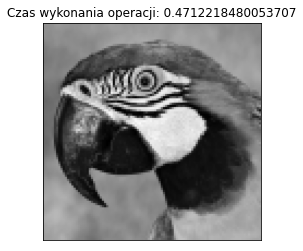

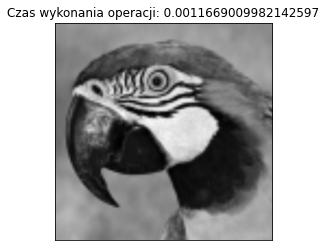

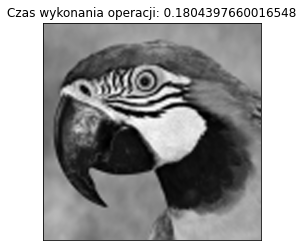

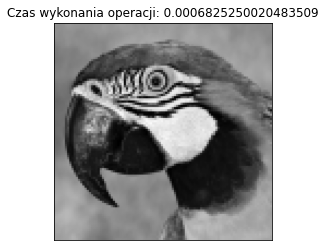

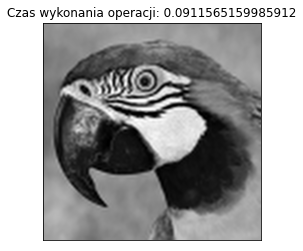

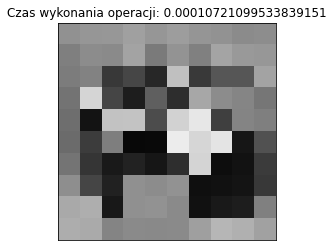

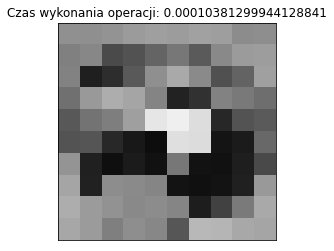

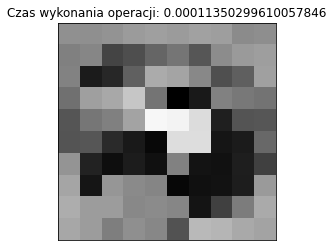

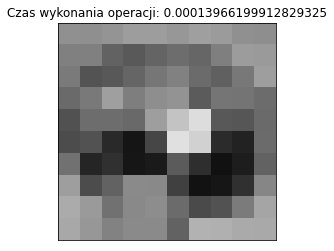

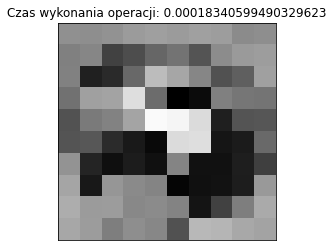

In [7]:
from timeit import default_timer as timer
#TODO Do samodzielnej implementacji
imag = cv2.imread("parrot.bmp", cv2.COLOR_RGB2GRAY)



def show_image(image, scalar_factor, interpol):

    start = timer()
    img = cv2.resize(image,None, fx=scalar_factor[0], fy=scalar_factor[1],interpolation=interpol)
    end = timer()
    plt.title("Czas wykonania operacji: " + str(end-start))
    plt.xticks([]), plt.yticks([])
    plt.imshow(img)
    plt.show()

show_image(imag, [10,10],cv2.cv2.INTER_NEAREST)
show_image(imag, [10,10],cv2.INTER_LINEAR)
show_image(imag, [10,10],cv2.INTER_CUBIC)
show_image(imag, [10,10],cv2.INTER_AREA)
show_image(imag, [10,10],cv2.INTER_LANCZOS4)


show_image(imag, [0.1,0.1],cv2.cv2.INTER_NEAREST)
show_image(imag, [0.1,0.1],cv2.INTER_LINEAR)
show_image(imag, [0.1,0.1],cv2.INTER_CUBIC)
show_image(imag, [0.1,0.1],cv2.INTER_AREA)
show_image(imag, [0.1,0.1],cv2.INTER_LANCZOS4)

## Rozdzielczość (dpi)

Omówioną wcześniej rozdzielczość przestrzenną (rozmiar) należy utożsamiać z rozmiarem macierzy w której zapisany jest obraz.
W tym ujęciu rozmiar pojedynczego piksela nie ma specjalnego znaczenia.
Problem pojawia się, kiedy obraz trzeba wyświetlić lub wydrukować.
Wtedy pojedynczy piksel staje się ,,obiektem fizycznym'' i musi mieć swój rozmiar (wysokość/szerokość/powierzchnię).

Parametr dpi (ang. *dots per inch*) określa liczbę kropek (pikseli), która mieści się na jednym calu (25,4 mm) długości/szerokości.
Dopiero kombinacja rozmiaru i rozdzielczości określa nam rzeczywisty rozmiar obrazu jaki uzyskamy na wydruku.

Dpi staje się istotne w przypadku drukowania, gdyż wyświetlanie na monitorze odbywa się zazwyczaj 1 piksel obrazka = 1 piksel na monitorze (w przypadku maksymalnej rozdzielczości wspieranej przez monitor), ew. następuje automatyczne skalowanie.

Wpływ rozdzielczości można zademonstrować w następujący sposób:
- wczytaj obraz *lena.bmp*.  Ma on rozmiar $512 \times 512$.
- wykorzystując funkcję `imresize` stwórz obrazy o rozmiarach $256 \times 256$, $128 \times 128$, $64 \times 64$ - metoda interpolacji jest w tym wypadku mniej istotna.
- wyświetl obrazy wymuszając zachowanie na ekranie wejściowej rozdzielczości $512 \times 512$. W przypadku biblioteki *matplotlib* ta funkcjonalność jest domyślna.

Proszę zaobserwować co dzieję się z obrazkiem.

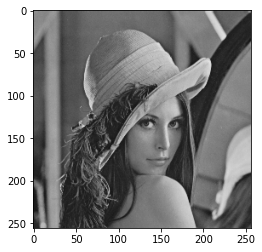

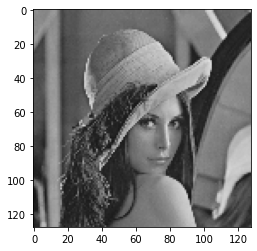

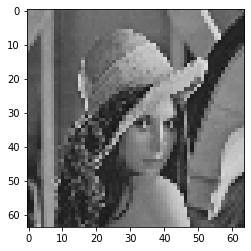

In [8]:
#TODO Porównanie
image = cv2.imread("lena.bmp", cv2.COLOR_RGB2GRAY)

I1 = cv2.resize(image, None,None,0.5,0.5,cv2.INTER_NEAREST)
plt.imshow(I1)
plt.show()

I2 = cv2.resize(image, None,None,0.25,0.25,cv2.INTER_NEAREST)
plt.imshow(I2)
plt.show()

I3 = cv2.resize(image, None,None,0.125,0.125,cv2.INTER_NEAREST)
plt.imshow(I3)
plt.show()

#obraz staje sie coraz mniej wyrazny

## Liczba poziomów jasności

Dla obrazów w skali szarości pojedynczy piksel zwykle zapisuje się na 8 bitach, co daje 256 rozróżnialnych poziomów szarości.
Dla większości zastosowań wartość ta jest wystarczająca (choć są kamery o wyjścu 12 lub 16 bitów).
Jednak oko ludzkie nie potrafi rozróżnić wszystkich 256 poziomów jasności (jest za mało czułe).
Zazwyczaj człowiek rozróżnia 20-30 poziomów szarości (to ile i jakie dokładnie rozróżnia, zależy od konkretnego oświetlenia sceny i cech osobniczych).

W poniższych krokach zademonstrujemy omówione zjawisko:
- wczytaj (użyj) obrazu _lena_,
- wykorzystując znaną funkcję `normalize` zmień liczbę poziomów szarości z 0-255 na:
    * 0-31
    * 0-15
    * 0-7
    * 0-3
    * 0-1 (binaryzacja)
- rezultaty wyświetl na wspólnym rysunku.

Podpowiedzi:
- trzeba przygotować tablice na obrazki np, `I_31 = np.zeros(I.shape,'uint8')`,
- prawidłowe użycie funkcji normalize `cv2.normalize(I,I_31,0,31,cv2.NORM_MINMAX)`,
- przykładowe wyświetlanie `axsHist[0,1].imshow(I, 'gray', vmin=0, vmax=31)`.

Czy rezultaty eksperymentu pasują do teorii o rozpoznawaniu przez człowieka ograniczonego zakresu poziomów jasności?
Wizualne porównanie których obrazów o tym świadczy ?

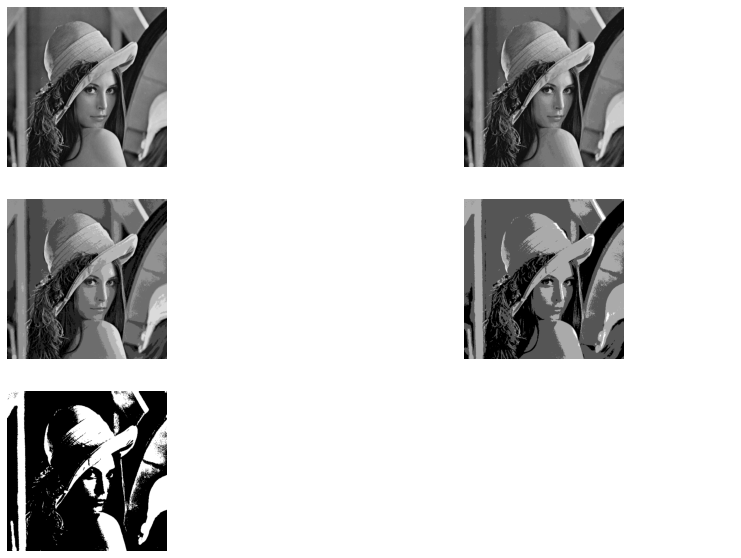

In [9]:
I = cv2.imread('lena.bmp')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

#TODO Do samodzielnej realizacji
I_31= np.zeros(I.shape,'uint8')
I_15= np.zeros(I.shape,'uint8')
I_7= np.zeros(I.shape,'uint8')
I_3= np.zeros(I.shape,'uint8')
I_1= np.zeros(I.shape,'uint8')

I_31d = cv2.normalize(I,I_31,0,31,cv2.NORM_MINMAX)
I_15d = cv2.normalize(I,I_15,0,15,cv2.NORM_MINMAX)
I_7d = cv2.normalize(I,I_7,0,7,cv2.NORM_MINMAX)
I_3d = cv2.normalize(I,I_3,0,3,cv2.NORM_MINMAX)
I_1d = cv2.normalize(I,I_1,0,1,cv2.NORM_MINMAX)

fig, axsHist = plt.subplots(3,2)
fig.set_size_inches(15, 10)
axsHist[0,0].axis("off")
axsHist[0,0].imshow(I_31d, 'gray', vmin=0, vmax=31)

axsHist[0,1].axis("off")
axsHist[0,1].imshow(I_15d, 'gray', vmin=0, vmax=15)

axsHist[1,0].axis("off")
axsHist[1,0].imshow(I_7d, 'gray', vmin=0, vmax=7)

axsHist[1,1].axis("off")
axsHist[1,1].imshow(I_3d, 'gray', vmin=0, vmax=3)

axsHist[2,0].axis("off")
axsHist[2,0].imshow(I_1d, 'gray', vmin=0, vmax=1)
axsHist[2,1].axis("off")


plt.show()

